# Nội dung 1: Làm quen với dữ liệu và Matplotlib
### Nhiệm vụ : 
<b>a. Tải tập dữ liệu và sử dụng pandas đọc dữ liệu </b>

<b>b. Phân tích cơ bản dùng Info() và Describe() để hiểu cấu trúc và các đặc điểm của dữ liệu</b>

> <b>c. Sử dụng Matplotlib để vẽ:</b>
>> - *Một biểu đồ cột (bar plot) thể hiện số lượng nhân viên theo mức lương (salary).*
>> - *Một biêu đồ phân tán (scatter plot) giữa satisfaction_level và last_evaluation, với màu sắc khác nhau cho nhân viên đã nghỉ việc (left = 1) à chưa nghỉ việc (left = 0).*


In [1]:
import pyspark
from pyspark.sql import SparkSession
import findspark
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
findspark.init
spark = SparkSession.builder.appName('mid-term').getOrCreate()
df_midterm = spark.read.csv(r'HR_comma_sep.csv',header= True, inferSchema=True)
df_pandas = df_midterm.toPandas()
print(df_pandas)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

+ <blackquote> <b> b. Phân tích cơ bản dùng Info() và Describe() để hiểu cấu trúc và các đặc điểm của dữ liệu

In [2]:
df_midterm.describe().show()
df_pandas.info()


+-------+-------------------+-------------------+------------------+--------------------+------------------+-------------------+-------------------+---------------------+---------+------+
|summary| satisfaction_level|    last_evaluation|    number_project|average_montly_hours|time_spend_company|      Work_accident|               left|promotion_last_5years|    sales|salary|
+-------+-------------------+-------------------+------------------+--------------------+------------------+-------------------+-------------------+---------------------+---------+------+
|  count|              14999|              14999|             14999|               14999|             14999|              14999|              14999|                14999|    14999| 14999|
|   mean| 0.6128335222348166| 0.7161017401159978|  3.80305353690246|   201.0503366891126| 3.498233215547703| 0.1446096406427095| 0.2380825388359224| 0.021268084538969265|     NULL|  NULL|
| stddev|0.24863065106114257|0.17116911062327556|1.232592355

><b>c. Sử dụng Matplotlib để vẽ:</b>
>>- *Một biểu đồ cột (bar plot) thể hiện số lượng nhân viên theo mức lương (salary).*
>>- *Một biêu đồ phân tán (scatter plot) giữa satisfaction_level và last_evaluation, với màu sắc khác nhau cho nhân viên đã nghỉ việc (left = 1) à chưa nghỉ việc (left = 0).*


<BarContainer object of 3 artists>

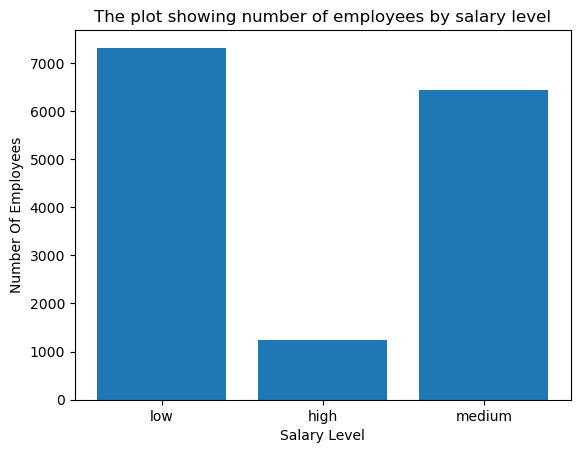

In [3]:
salary_bar = df_midterm.groupBy('salary').count().toPandas()
plt.xlabel('Salary Level')
plt.ylabel('Number Of Employees')
plt.title('The plot showing number of employees by salary level')
plt.bar(salary_bar['salary'],salary_bar['count'], data=salary_bar)

Text(0.5, 1.0, 'Scatter plot between Satisfaction Level and Last Evaluation')

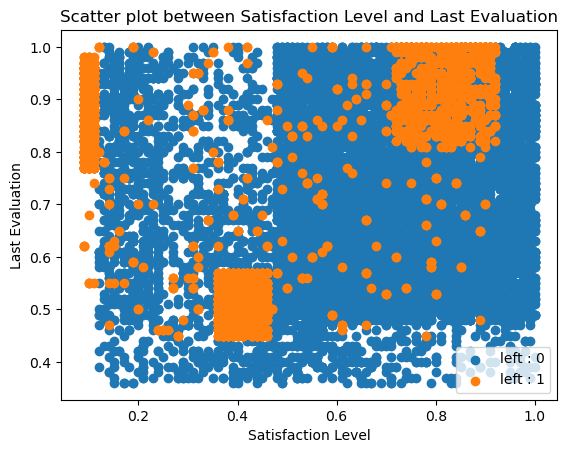

In [4]:
left = df_pandas[df_pandas['left'] == 1]
still = df_pandas[df_pandas['left'] == 0]
plt.scatter(x = still['satisfaction_level'],y= still['last_evaluation'], label = 'left : 0')
plt.scatter(x = left['satisfaction_level'],y= left['last_evaluation'], label = 'left : 1')
plt.legend()
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title("Scatter plot between Satisfaction Level and Last Evaluation")



# Nội dung 2: Trực quan hóa nâng cao với Seaborn
### Nhiệm vụ:
><b> a. Sử dụng Seaborn để vẽ:</b>
>> - *Một Implot giữa satisfaction_level và last_evaluation với hue='left' (xem trang 151-153). Một boxplot so sánh phân phối satisfaction_level theo mức lương (salary) (xem trang 156-157).*
>> - *Một countplot thể hiện số lượng nhân viên theo salary, phân loại theo left (xem trang 159-161).*<br>

<b>b. Viết nhận xét ngắn về xu hướng hoặc mối quan hệ mà bạn nhận thấy từ các biểu đồ.</b>

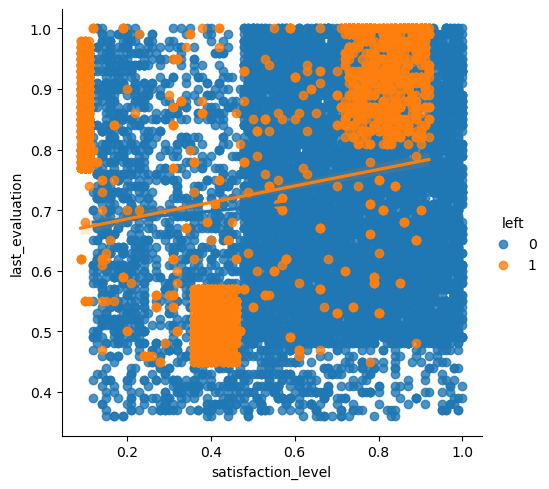

In [5]:
#Import seaborn Libary
import seaborn as sns


#Lmplot between Satisfaction Level and Last Evaluation with Hue = ' Left '
sns.lmplot(x = 'satisfaction_level',
           y = 'last_evaluation',
           data = df_pandas,
           hue = 'left')
plt.show()

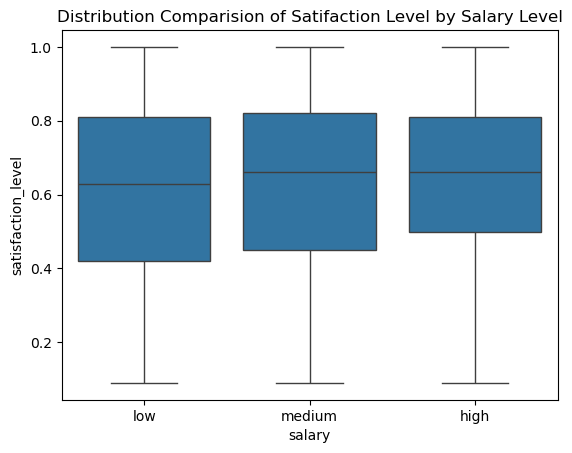

In [6]:
#A boxplot comparing the distribution of satisfaction level by salary level
sns.boxplot(x = 'salary',
            y = 'satisfaction_level',
            data = df_pandas)
plt.title('Distribution Comparision of Satifaction Level by Salary Level')
plt.show()

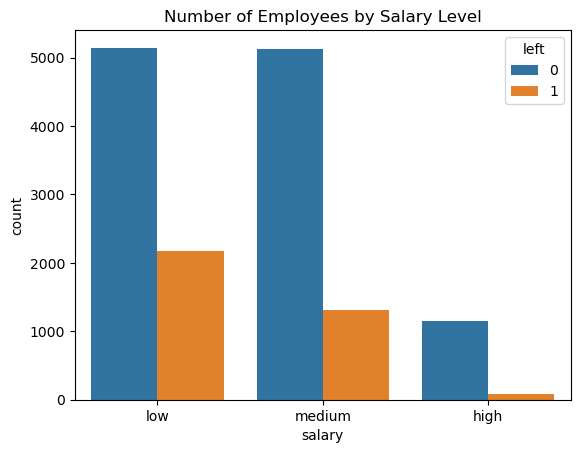

In [7]:
#Countplot show number of employees by salary level, categoried by left column
sns.countplot(x= 'salary',data =df_pandas, hue = 'left')
plt.title('Number of Employees by Salary Level')
plt.show()


In [8]:
#Short comment about tendency or relationship you see from each plot


# Nội dung 3: Trực quan hóa tương tác với Bokeh 
### Nhiệm vụ:</b>
> <b>a. Sử dụng Bokeh để vẽ: </b>
>> - *Một biểu đồ phân tán tương tác (interactive scatter plot) giữa satisfaction_level và last_evaluation, với tính năng hover tool hiển thị thông tin salary và left khi di chuột qua các điểm (xem trang 183-184).*
>> - *Sử dụng column layout để xếp dọc hai biểu đồ: (1) biểu đồ cột thể hiện số lượng nhân viên theo salary, (2) biểu đồ phân tán tương tác giữa satisfaction level và last evaluation như trên. Đảm bảo cả hai biểu đồ hiển thị cùng lúc trong một giao diện. (xem trang 169-176).*<br>

> <b>b. Thêm tính năng tương tác như ẩn/hiện (hide click policy) cho các nhóm nhân viên (left = 0 hoặc left = 1) trong biểu đồ phân tán (xem trang 177-179).</b>

In [75]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.io import output_notebook
from bokeh.layouts import column
from bokeh.palettes import Vibrant
from bokeh.transform import factor_cmap
output_notebook()

#MENTION
#Showing a Scatter Plot Between Satisfaction Level and Last Evaluation
satis_source = ColumnDataSource(data = df_pandas)
satis_plot_scatter = figure(title = 'Scatter Plot Between Satisfaction Level And Last Evaluation',
                            x_axis_label = 'Satisfaction Level',
                            y_axis_label = 'Last Evaluation')

satis_plot_scatter.scatter('satisfaction_level',
                           'last_evaluation', 
                           source = satis_source,
                           color=factor_cmap('left', palette=['blue', 'red'], factors=['0', '1']),
                           legend_field="left")

satis_plot_scatter.legend.title = "Left Status"
satis_plot_scatter.legend.click_policy = "hide"
#Adding Hover Tool

hover = HoverTool(tooltips = [
    ('salary','@salary'),
    ('left','@left')
])
satis_plot_scatter.add_tools(hover)



#-------------------------------------------------------------------------------#
#Showing a Bar Plot of Relationship Between Number of Employees and Salary Level

#Get a pandas table of Salary From Sample DataFrame
salary_info = df_midterm.groupBy('salary').count().toPandas()

salary_plot_bar = figure(x_range = salary_info['salary'],
                        title = 'Scatter Plot Between Number Of Employees And Salary Level',
                        x_axis_label = 'Salary Level',
                        y_axis_label = 'Number of Employees')

salary_source = ColumnDataSource(data = salary_info)

salary_plot_bar.vbar(x = 'salary',
                     top ='count', 
                     source = salary_source,
                     width = 0.8,
                     legend_label = 'salary')



#MENTION
#Convert two above plots into a column layout
col_layout  = column(satis_plot_scatter, salary_plot_bar)
show(col_layout)



Loading BokehJS ...


#  Nội dung 4: Tổng hợp và phân tích
### Nhiệm vụ:
> <b>a. Chọn ít nhất 3 biểu đồ từ các nội dung trước (một từ Matplotlib, một từ Seaborn, một từ Bokeh) và cải tiến chúng (ví dụ: thêm tiêu đề, nhãn trục, chú thích, hoặc thay đổi màu sắc).</b><br>

><b>b. Viết một báo cáo ngắn (khoảng 1000 từ) trong Jupyter Notebook, bao gồm:</b>
>> - *Phần 1 (khoảng 200 từ): Mô tả tập dữ liệu và mục tiêu phân tích.* <br>
>> - *Phần 2 (khoảng 300 từ): Giải thích cách tạo biểu đồ và lý do chọn loại biểu đồ.*<br>
>> - *Phần 3 (khoảng 300 từ): Phân tích xu hướng và thông tin chi tiết từ biểu đồ.* <br>
>> - *Phần 4 (khoảng 200 từ): Đề xuất hành động cho bộ phận nhân sự*<br>

><b>c. (Tùy chọn nâng cao) Thêm một slider widget trong Bokeh để điều chỉnh ngưỡng satisfaction_level và cập nhật biểu đồ theo thời gian thực (xem trang 186-188). Phần tùy chọn nâng cao nếu hoàn thành tốt sẽ được cộng thêm 1 điểm.</b>

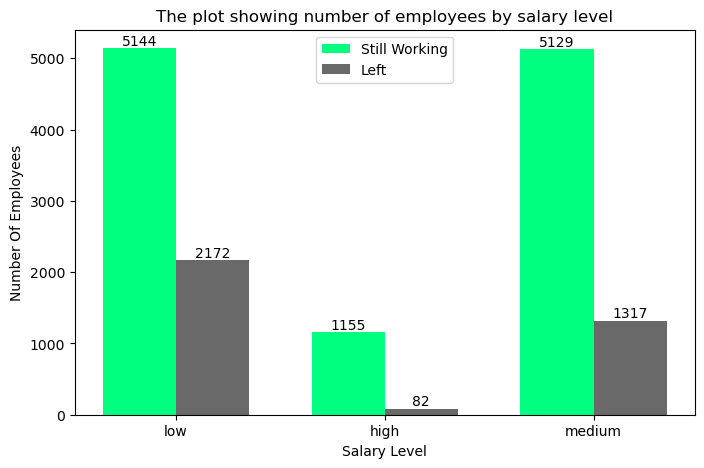

In [105]:
from pyspark.sql import functions as func
import numpy as np

### Innovate a Bar Plot Using Matplotlib by Dividing Columns Salary Level into Two Categories is 'Left' or 'Still Working' based on Number of Employees
sal_byleft = df_midterm.groupBy('salary').agg(
    func.sum(func.when(func.col('left') == 1,1).otherwise(0)).alias('left'),
    func.sum(func.when(func.col('left') == 0,1).otherwise(0)).alias('still')).toPandas()

#Create a figure size
plt.figure(figsize=(8,5))

#Create a int array to get a lenght of Salary Level
x = np.arange(len(salary_bar["salary"]))

#Create Width of Columns
width = 0.35


### Divide this plot by left column
bar_left = plt.bar(x - width/2, sal_byleft['still'], width, color ='springgreen', label = 'Still Working')
bar_still = plt.bar(x + width/2, sal_byleft['left'], width, color ='dimgray', label = 'Left')


#Using Loop to get a accurate number of employees

for bar in bar_left:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', ha = 'center', va = 'bottom')
for bar in bar_still:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', ha = 'center', va = 'bottom')

#Adding  X - Y Label, Title, show Label and The Plot
plt.xlabel('Salary Level')

plt.xticks(x,sal_byleft['salary'])

plt.ylabel('Number Of Employees')

plt.title('The plot showing number of employees by salary level')
plt.legend()

plt.show()

